# 랜덤 포레스트

결정 트리의 과대적합 문제를 회피할 수 있다. 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초함. 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있슴. 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것이 수학적으로 증명됨.

랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야함(RandomForestRegressor 나 RandomForestClassifier 의 n_estimators 매개변수). 트리를 만들기 위해 먼저 데이터의 부스트랩 샘플을 생성함. 이 샘플을 생성하는 방법은 n_samples 개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수 만큼 반복 추출하는 것(한 샘플이 여러번 중복 추출 될 수 있다). 이 데이터셋은 원래 데이터셋 크기와 같지만, 어떤 데이터 포인트는 누락 될 수도 있고 어떤 데이터 포인트는 중복되어 들어 있을 수 있다.

결정 트리 알고리즘은 전체 특성을 대상으로 최선의 테스트를 찾는 것이지만 랜덤 포레그트 알고리즘은 전체 특성을 대상으로 하는 것이 아닌 max_features 매개변수로 몇 개의 특성을 고를지 정한 후 트리를 만들 때 마다 특성들 중 무작위로 일부 특성만 뽑아 트리를 만든다. 랜덤 포레스트 방식에서 핵심 매개변수는 max_features이다. 

랜덤 포레스트로 예측을 할 때는 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만든다. 회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만들고, 분류의 경우는 약한 투표 전략을 사용. -> 즉, 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 함. 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됨.

In [13]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons


X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

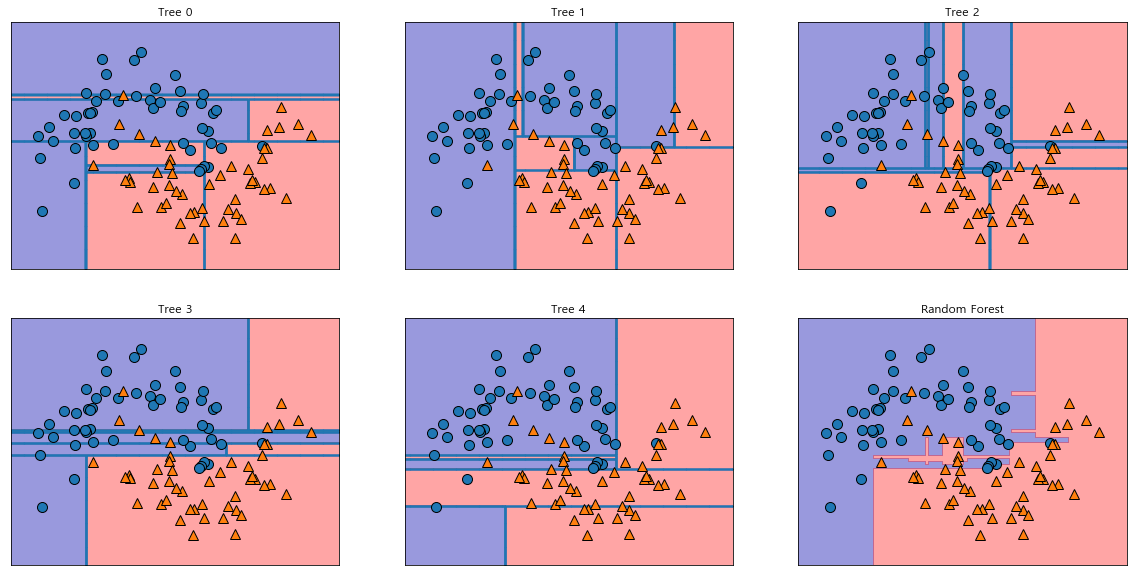

In [14]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print('train set accuracy: {:.3f}'.format(forest.score(X_train,y_train)))
print('test set accuracy: {:.3f}'.format(forest.score(X_test, y_test)))

train set accuracy: 1.000
test set accuracy: 0.972


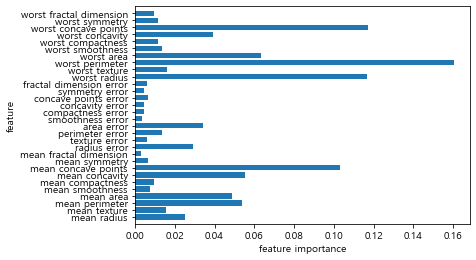

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    

plot_feature_importances_cancer(forest)

랜덤 포레스트에서는 단일 결정 나무보다 훨씬 많은 특성이 0 이상의 중요도 값을 갖는다. 단일 결정 나무와 마찬가지로 "worst radius" 특성이 매우 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는 "worst perimeter" 를 선택함. 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 하무로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라 볼 수 있게 함.

랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희고한 데이터에는 잘 작동하지 않음. 이런 데이터에는 선형 모델이 더 적합함. 랜덤 포레스트는 매우 큰 데이터셋에도 잘 작동함. 하지만 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느림.

중요 매개변수는 n_estimators, max_features 이고 max_depth 같은 사전 가지치기 옵션이 있다. n_estimators는 클수록 좋음. 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만듦. 하지만 더 많은 트리는 더 많은 메모리와 긴 훈련시간으로 이어짐. max_features는 각 트리가 얼마나 무작위가 될지를 결정하며 작은 max_features는 과대적합을 줄여줌. 일반적으로 기본값을 쓰는 것이 좋은 방법. 분류는 max_features=sqrt(n_features)이고 회귀는 max_features=n_features 이다. max_features나 max_leaf_nodes 매개변수를 추가하면 가끔 성능이 향상되기도 함.

# 그레이디언트 부스팅 회귀 트리

그레이디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법. 이름이 회귀지만 이 모델은 회귀와 분류 모두에 사용 가능. 랜덤 포레스트와는 달리 그레이디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦. 기본적으로 그레이디언트 부스팅 트리는 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠름. 그레이디언트 부스팅의 근본 아이디어는 이런 얕은 트리같은 간단한 모델(약한 학습기 weak learner)을 많이 연결하는 것. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아짐.

앙상블 방식에 있는 사전 가지치기나 트리 개수 외에도 그레이디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate 이다. 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다. n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련세트에서의 오차를 줄어들게 할 기회가 많아짐. 매개변수의 기본값은 깊이가 3, 트리 100개, 학습률 0.1 이다.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("Train set accuracy: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test,y_test)))

Train set accuracy: 1.000
Test set accuracy: 0.965


훈련 세트의 정확도가 100% 이므로 과대적합을 의심 -> 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮춰야함.

In [22]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print("Train set accuracy: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test,y_test)))

Train set accuracy: 0.991
Test set accuracy: 0.972


In [23]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Train set accuracy: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test,y_test)))

Train set accuracy: 0.988
Test set accuracy: 0.965


위의 두 방식은 모델의 복잡도를 감소시키므로 예상대로 훈련 셋의 정확도가 낮아짐. 학습률을 낮추는 것은 테스트 셋의 성능 향상에 작게 기여했으나, 트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여.

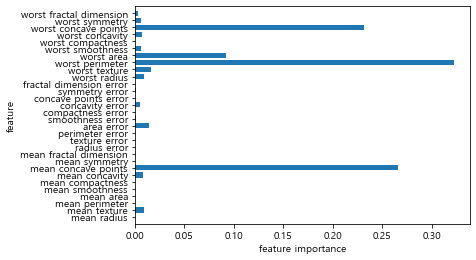

In [24]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

그레이디언트 부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트와 비슷한 특성을 강조하지만 그레이디언트 부스팅은 일부 특성을 완전히 무시함.

그레이디언트 부스팅 결정 트리의 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련시간이 길다는 것. 하지만 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 동작함. 그리고 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않음.

그레이디언트 부스팅 트리 모델의 중요 매개변수는 트리의 개수를 지정하는 n_estimators와 이전 트리의 오차를 보정하는 정도를 조절하는 learning_rate 이다. 이 두 매개변수는 매우 깊게 연관 되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야함. n_estimators가 클수록 좋은 랜덤 포레스트와는 달리 그레이디언트 부스팅에서 n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아짐. 일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는 것. 중요한 또 다른 매개변수는 각 트리의 복잡도를 낮추는 max_depth(또는 max_leaf_nodes)이다. 통상 그레이디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 싶이가 5보다 깊어지지 않게 함.